In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib

In [45]:
df=pd.read_csv("Sales Channel Prediction.csv")

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
print(df.nunique())

TV           190
radio        167
newspaper    172
sales        121
dtype: int64


In [13]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

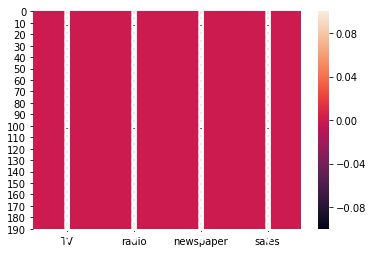

In [14]:
sns.heatmap(df.isnull(),annot=True)
plt.show()

In [15]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [16]:
from scipy.stats import zscore
zscore=abs(zscore(df))
print(df.shape)
df_final=df.loc[(zscore<3).all(axis=1)]
print(df_final.shape)

(200, 4)
(198, 4)


In [17]:
df_final.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.049771,0.779121
radio,0.051978,1.000000,0.346364,0.576748
newspaper,0.049771,0.346364,1.000000,0.219555
sales,0.779121,0.576748,0.219555,1.000000


In [18]:
df_final.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [19]:
for col in df_final.columns:
    if df_final.skew().loc[col]>0.55:
        df_final[col]=np.log1p(df_final[col])
df_final.skew()

C:\Users\A587479\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


TV          -0.082332
radio        0.114842
newspaper   -0.839481
sales        0.407130
dtype: float64

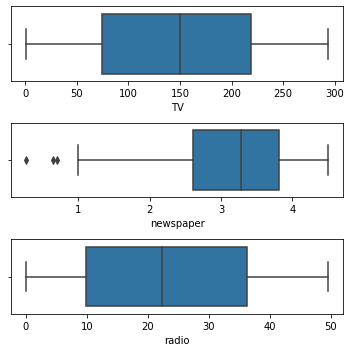

In [20]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df_final['TV'], ax = axs[0])
plt2 = sns.boxplot(df_final['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df_final['radio'], ax = axs[2])
plt.tight_layout()

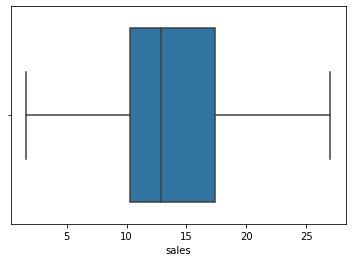

In [21]:
sns.boxplot(df_final['sales'])
plt.show()

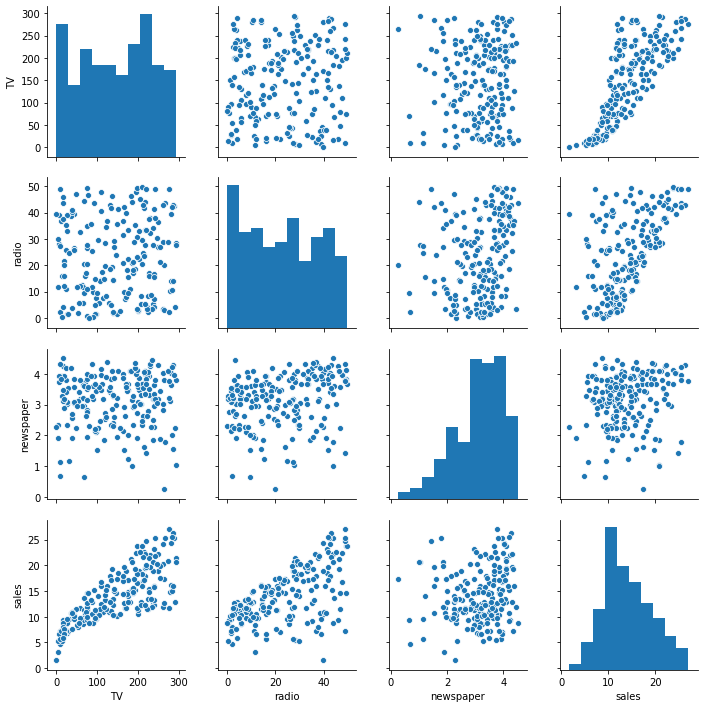

In [22]:
sns.pairplot(df_final)

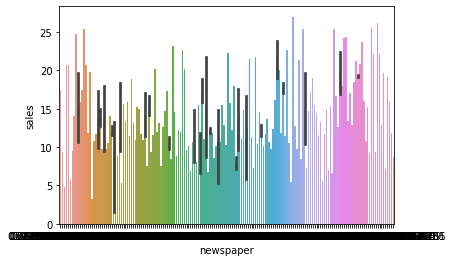

In [23]:
sns.barplot(x="newspaper",y="sales",data=df_final)
plt.show()

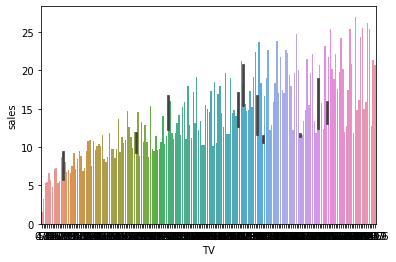

In [24]:
sns.barplot(x="TV",y="sales",data=df_final)
plt.show()

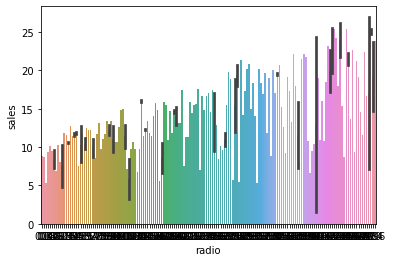

In [25]:
sns.barplot(x="radio",y="sales",data=df_final)
plt.show()

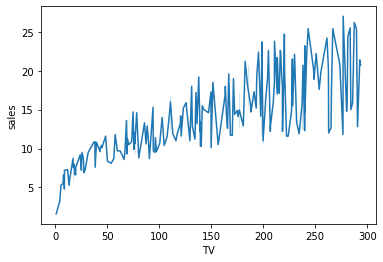

In [26]:
sns.lineplot(x="TV",y="sales",data=df_final)
plt.show()

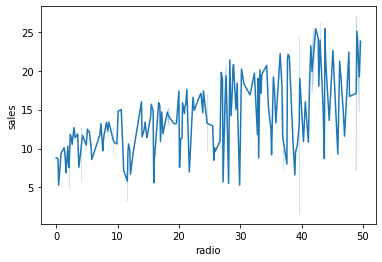

In [27]:
sns.lineplot(x="radio",y="sales",data=df_final)
plt.show()

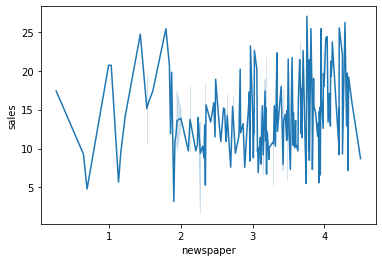

In [28]:
sns.lineplot(x="newspaper",y="sales",data=df_final)
plt.show()

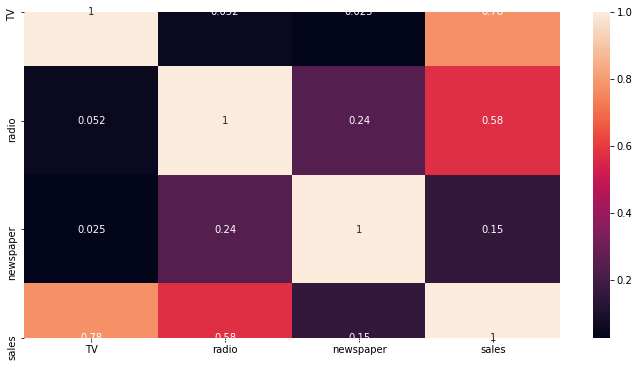

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df_final.corr(),annot=True)

In [30]:
x=df_final.drop(columns=["sales"])
y=df_final[["sales"]]

In [31]:
 x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = 55,test_size=0.20)

In [32]:
x_train.shape

(158, 3)

In [33]:
x_test.shape

(40, 3)

In [34]:
y_train.shape

(158, 1)

In [35]:
y_test.shape

(40, 1)

In [36]:
from sklearn import linear_model
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(60,100):
    x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is: ",max_r_score)

max r2 score corresponding to  90  is:  0.9461876382106832


In [37]:
from sklearn.model_selection  import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y, cv=5,scoring="r2").mean()

0.8862866381230523

In [40]:
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = 90,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict((x_test))

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print(("r2 score is: ",r2_score(y_test,y_pred)))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

('r2 score is: ', 0.9461876382106832)
RMSE is : 1.2736796088176252


In [43]:
from sklearn.externals import joblib
joblib.dump(lr, "lr_saleschannel.pk1")

['lr_saleschannel.pk1']